In [1]:
from main import *
import seaborn as sns

Вариант 7:
\begin{align}
    \frac {\partial^2{u}} {\partial{x^2}} + \frac {\partial^2{u}} {\partial{y^2}} = -2u, \\
U(0, y) = cos(y), \\
U(\frac {\pi} {2}, y) = 0, \\
U(x, 0) = cos(x), \\
U(x, \frac {\pi} {2}) = 0
\end{align}
Аналитическое решение:
\begin{align}
U(x, y) = cos(x) \cdot cos(y)
\end{align}

Ввод данных

In [2]:
N_X, N_Y = int(input()), int(input())

In [3]:
params = {
        'a': 0,
        'b': 0,
        'c': 2,
        'd': 1,
        'lx': np.pi / 2,
        'ly': np.pi / 2,
        'w': 1.5,
        'f': lambda x, y: 0,
        'alpha1': 0,
        'alpha2': 1,
        'beta1': 0,
        'beta2': 1,
        'gamma1': 0,
        'gamma2': 1,
        'delta1': 0,
        'delta2': 1,
        'phi1': lambda y: np.cos(y),
        'phi2': lambda y: 0,
        'phi3': lambda x: np.cos(x),
        'phi4': lambda x: 0,
        'solution': lambda x, y: np.cos(x) * np.cos(y),
    }

In [4]:
def plot_graphics(dict_, nx, ny, time, method_name: str):
    x = np.arange(0, np.pi / 2 + np.pi / 2 / nx, np.pi / 2 / nx)
    y = np.arange(0, np.pi / 2 + np.pi / 2 / ny, np.pi / 2 / ny)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])
    
    sns.set_style("darkgrid")
    
    # Создаем subplot с двумя графиками
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Первый график - U(x)
    axes[0].set_title('U(x)')
    axes[0].plot(x, z1[time], color='b', label='numerical')
    axes[0].plot(x, z2[time], color='r', label='analytic')
    axes[0].legend(loc='best')
    axes[0].set_ylabel('U')
    axes[0].set_xlabel('x')
    
    # Второй график - Error(t)
    err = [calculate_error(z1[i], z2[i]) for i in range(len(z1))]
    axes[1].set_title('Error(t)')
    axes[1].plot(y, err, color='r', label='err')
    axes[1].legend(loc='best')
    axes[1].set_ylabel('Error')
    axes[1].set_xlabel('t')
    
    fig.suptitle(method_name)
    plt.show()

### Метод простых итераций

In [8]:
solver = EllipticalSolver(params, 'simple_iteration_method')
solved = solver.solve(N_X, N_Y)
ans = {
    'numerical': solved[0],
    'iterations': solved[1],
    'analytic': solver.analytic_solve(N_X, N_Y),
}

print('Сделано итераций:',ans['iterations'])

Сделано итераций: 2605


In [9]:
curr_time = int(input())

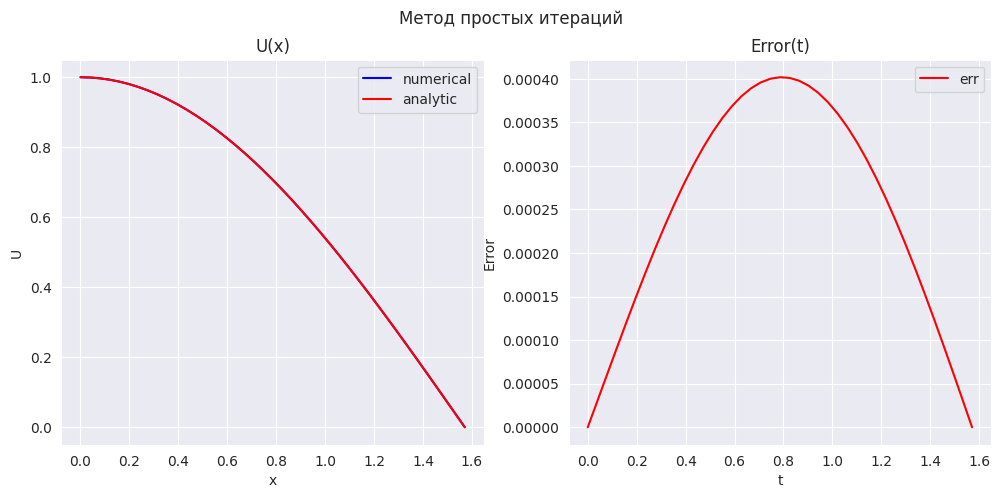

In [10]:
plot_graphics(ans, N_X, N_Y, curr_time, "Метод простых итераций")

### Метод Зейделя

In [14]:
solver = EllipticalSolver(params, 'seidel_method')
solved = solver.solve(N_X, N_Y)
ans = {
    'numerical': solved[0],
    'iterations': solved[1],
    'analytic': solver.analytic_solve(N_X, N_Y),
}

print('Сделано итераций:',ans['iterations'])

Сделано итераций: 1446


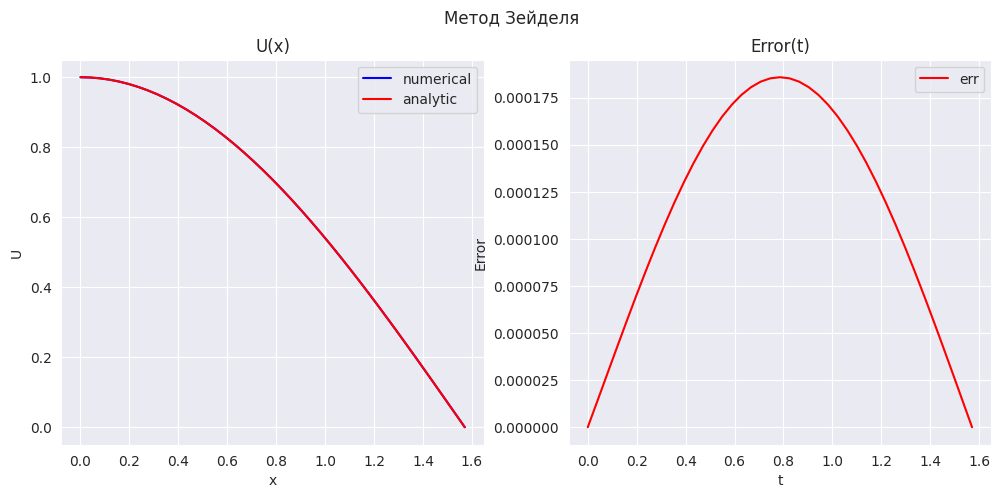

In [15]:
plot_graphics(ans, N_X, N_Y, curr_time, "Метод Зейделя")

### Метод простых итераций с верхней релаксацией

In [16]:
solver = EllipticalSolver(params, 'simple_iteration_method_relaxed')
solved = solver.solve(N_X, N_Y)
ans = {
    'numerical': solved[0],
    'iterations': solved[1],
    'analytic': solver.analytic_solve(N_X, N_Y),
}

print('Сделано итераций:',ans['iterations'])

Сделано итераций: 553


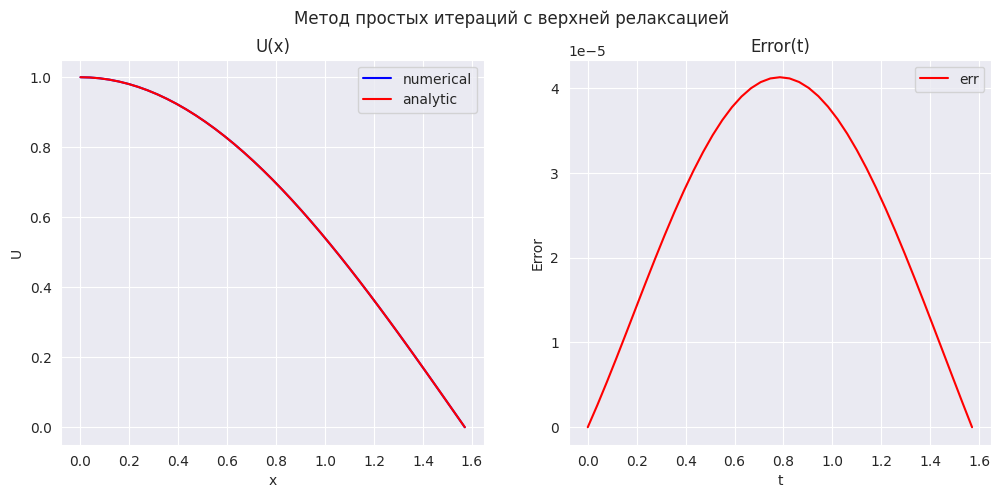

In [18]:
plot_graphics(ans, N_X, N_Y, curr_time, "Метод простых итераций с верхней релаксацией")